In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
%matplotlib inline

In [9]:
from scipy import stats

In [17]:
# read the data of SPY
spy_etf = pd.read_csv('SPY.csv',index_col='Date',parse_dates=True)

In [18]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2282 entries, 2009-12-31 to 2019-01-25
Data columns (total 6 columns):
Open         2282 non-null float64
High         2282 non-null float64
Low          2282 non-null float64
Close        2282 non-null float64
Adj Close    2282 non-null float64
Volume       2282 non-null int64
dtypes: float64(5), int64(1)
memory usage: 124.8 KB


In [19]:
spy_etf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,112.769997,112.800003,111.389999,111.440002,92.968788,90637900
2010-01-04,112.370003,113.389999,111.510002,113.330002,94.545494,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,94.795784,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,94.862526,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,95.262955,131091100


In [20]:
# read the data of APPLE
apple = pd.read_csv('AAPL.csv',index_col='Date',parse_dates=True)

In [21]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2282 entries, 2009-12-31 to 2019-01-25
Data columns (total 6 columns):
Open         2282 non-null float64
High         2282 non-null float64
Low          2282 non-null float64
Close        2282 non-null float64
Adj Close    2282 non-null float64
Volume       2282 non-null int64
dtypes: float64(5), int64(1)
memory usage: 124.8 KB


In [22]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,20.159719,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,20.473503,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,20.508902,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,20.182680,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,20.145369,119282800


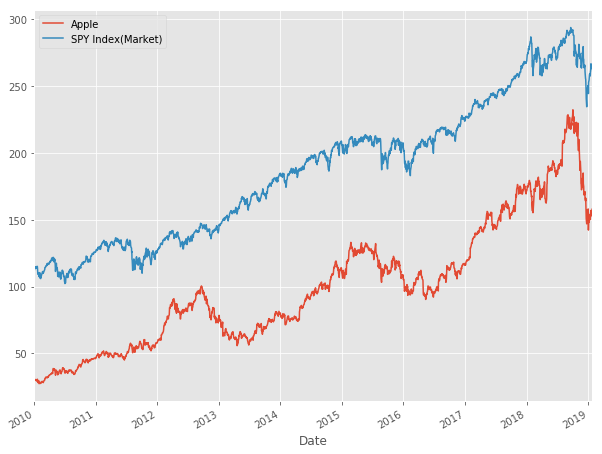

In [24]:
# plot out the raw data
apple['Close'].plot(figsize=(10,8),label="Apple")
spy_etf['Close'].plot(figsize=(10,8),label="SPY Index(Market)")
plt.legend();

In [25]:
# Calculate for cumulative return
apple['Cumulative'] = apple['Close']/apple['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

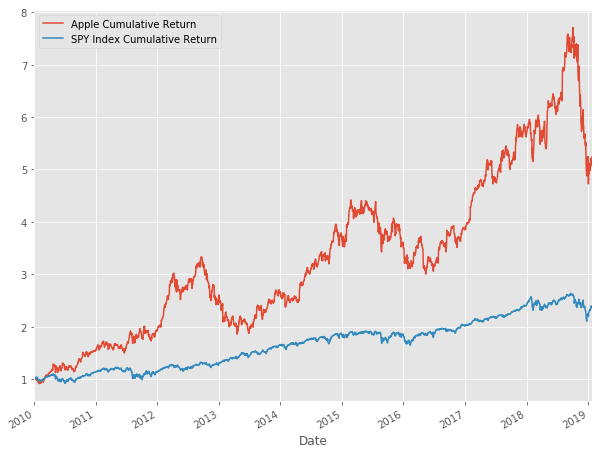

In [28]:
# plot out the cumulative return
apple['Cumulative'].plot(figsize=(10,8),label="Apple Cumulative Return")
spy_etf['Cumulative'].plot(figsize=(10,8),label="SPY Index Cumulative Return")
plt.legend();

In [39]:
# Calculate the Daily Return
apple['Daily Return'] = apple['Close'].pct_change(periods=1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(periods=1)

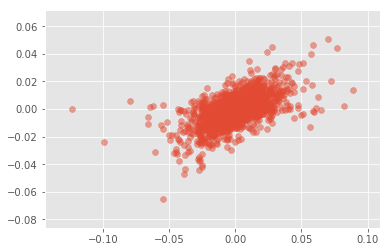

In [40]:
# plot the scatter plot
plt.scatter(apple['Daily Return'],spy_etf['Daily Return'],alpha=0.5);

In [41]:
# Calculate the beta and alpha for CAPM

beta,alpha,r_value,p_value,std_err = stats.linregress(apple['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [42]:
beta

0.33884746751497108

In [43]:
alpha

0.00013448219156091384

In [44]:
r_value

0.58534784929874484

# Create a fake stock to prove our idea of CAPM

In [64]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [65]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

In [66]:
fake_stock.head()

Date
2010-01-04    0.014625
2010-01-05    0.001308
2010-01-06    0.000387
2010-01-07    0.006186
2010-01-08    0.004221
Name: Daily Return, dtype: float64

In [67]:
beta2,alpha2,r_value2,p_value2,std_err2 = stats.linregress(fake_stock,spy_etf['Daily Return'].iloc[1:])

In [68]:
beta2

0.98747861460895003

In [69]:
alpha2

-2.9074027434187653e-06

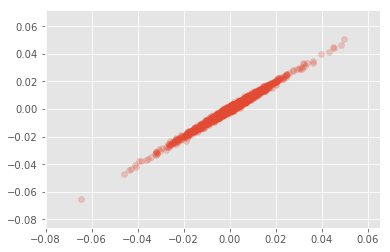

In [70]:
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:],alpha=0.25)